In [1]:
import pandas as pd

df = pd.read_csv("titanic_test.csv")

print(df.head())
print(df.shape)
print(df.info())

FileNotFoundError: [Errno 2] No such file or directory: 'titanic_test.csv'

In [3]:
import pandas as pd

# 1️⃣ Data Load လုပ်ခြင်း
df = pd.read_csv(r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\test.csv')

X = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

# Target မရှိသေးပါဘူး
print(X.head())
print("Feature Shape:", X.shape)

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  34.5      0      0   7.8292        Q
1       3  female  47.0      1      0   7.0000        S
2       2    male  62.0      0      0   9.6875        Q
3       3    male  27.0      0      0   8.6625        S
4       3  female  22.0      1      1  12.2875        S
Feature Shape: (418, 7)


In [8]:
import pandas as pd

# 1️⃣ Data Load
df = pd.read_csv(r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\test.csv')

# 2️⃣ Sex ကို numeric ပြောင်းခြင်း
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

# 3️⃣ Feature (X) သာ ခွဲထုတ်ခြင်း
X = df[['Sex']]   # Sex တစ်ခုတည်းသာ feature အဖြစ်

# Target မရှိပါ
print("Feature Shape:", X.shape)
print(X.head())

Feature Shape: (418, 1)
   Sex
0    0
1    1
2    0
3    0
4    1


C:\Users\kiki\AppData\Local\Temp\ipykernel_21640\2555758613.py:16: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Age'].fillna(df['Age'].median(), inplace=True)


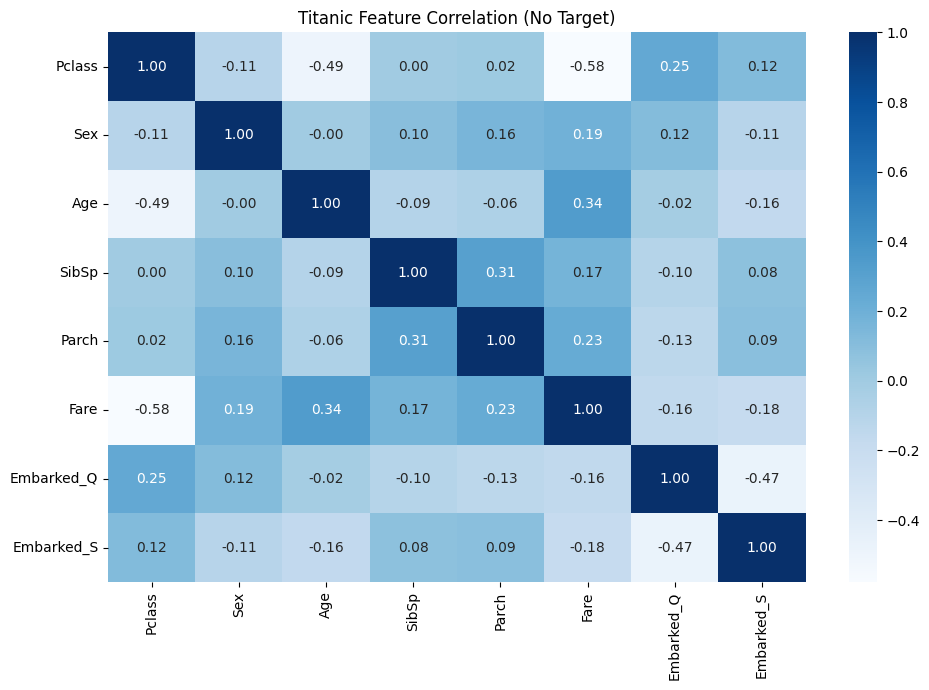

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Data Load
df = pd.read_csv(r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\test.csv')

# 2️⃣ Drop irrelevant columns
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

# 3️⃣ Encode categorical features
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# 4️⃣ Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)

# 5️⃣ Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Titanic Feature Correlation (No Target)")
plt.tight_layout()
plt.show()

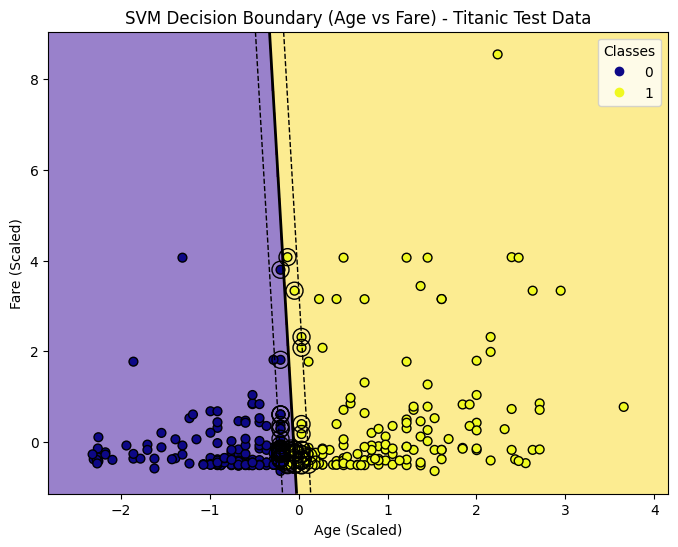

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 1️⃣ Data Load
df = pd.read_csv(r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\test.csv')

# 2️⃣ Drop irrelevant columns
df = df.drop(['PassengerId','Name','Ticket','Cabin','Sex','Embarked'], axis=1, errors='ignore')

# 3️⃣ Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# 4️⃣ Select Age and Fare for 2D plotting
X_vis = df[['Age','Fare']].values

# 5️⃣ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)

# 6️⃣ Fake labels for visualization (Age above median = 1, below = 0)
y_vis = (df['Age'] > df['Age'].median()).astype(int).values

# 7️⃣ Train SVM (linear kernel)
model = SVC(kernel='linear', C=1)
model.fit(X_scaled, y_vis)

# 8️⃣ Create grid for plotting
x_min, x_max = X_scaled[:,0].min() - 0.5, X_scaled[:,0].max() + 0.5
y_min, y_max = X_scaled[:,1].min() - 0.5, X_scaled[:,1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 9️⃣ Plot
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap='plasma', alpha=0.5)

# Decision boundary and margins
P = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, P, colors='black', levels=[-1,0,1],
            linestyles=['--','-','--'], linewidths=[1,2,1])

# Data points
scatter = plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_vis, cmap='plasma',
                      s=40, edgecolors='k', label='Data Points')

# Support vectors
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
            s=150, linewidth=1, facecolors='none', edgecolors='black',
            label='Support Vectors')

plt.xlabel('Age (Scaled)')
plt.ylabel('Fare (Scaled)')
plt.title('SVM Decision Boundary (Age vs Fare) - Titanic Test Data')
plt.legend(*scatter.legend_elements(), title='Classes', loc='upper right')
plt.show()

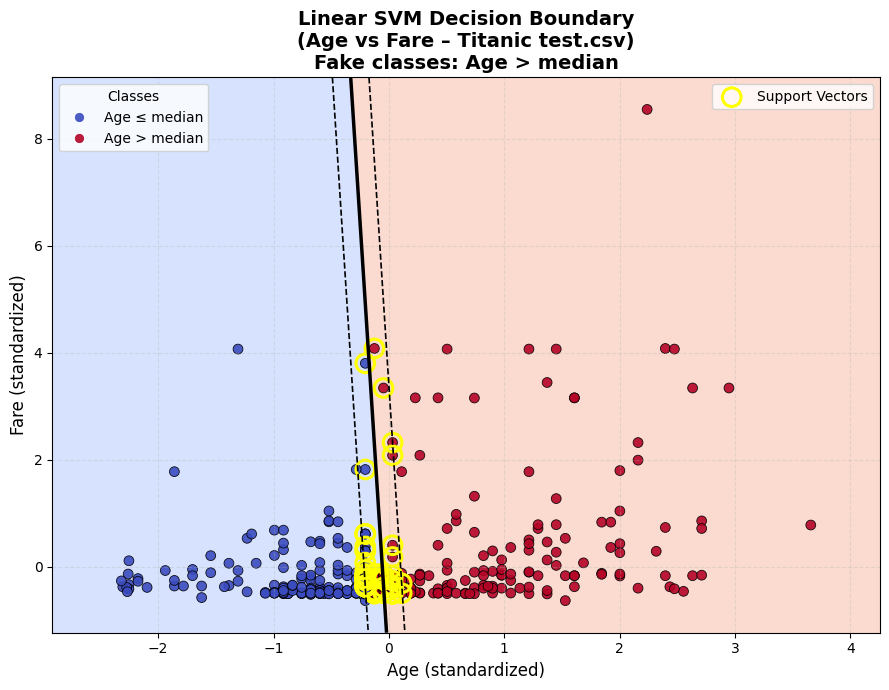

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# ────────────────────────────────────────────────
# 1. Load the test data
# ────────────────────────────────────────────────
filepath = r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\test.csv'
df = pd.read_csv(filepath)

# ────────────────────────────────────────────────
# 2. Drop columns not needed for this visualization
# ────────────────────────────────────────────────
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# ────────────────────────────────────────────────
# 3. Handle missing values (simple median imputation)
# ────────────────────────────────────────────────
df['Age']  = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# ────────────────────────────────────────────────
# 4. Features for 2D visualization: Age & Fare
# ────────────────────────────────────────────────
X_vis = df[['Age', 'Fare']].values

# ────────────────────────────────────────────────
# 5. Scale the features (very important for SVM)
# ────────────────────────────────────────────────
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)

# ────────────────────────────────────────────────
# 6. Create fake binary target just for visualization
#    (1 = Age above median, 0 = Age below or equal median)
# ────────────────────────────────────────────────
median_age = df['Age'].median()
y_vis = (df['Age'] > median_age).astype(int).values

# ────────────────────────────────────────────────
# 7. Train Linear SVM
# ────────────────────────────────────────────────
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_scaled, y_vis)

# ────────────────────────────────────────────────
# 8. Create meshgrid for decision boundary
# ────────────────────────────────────────────────
x_min, x_max = X_scaled[:, 0].min() - 0.6, X_scaled[:, 0].max() + 0.6
y_min, y_max = X_scaled[:, 1].min() - 0.6, X_scaled[:, 1].max() + 0.6

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

# Predict on every point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Decision function values (for margins)
P = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
P = P.reshape(xx.shape)

# ────────────────────────────────────────────────
# 9. Beautiful visualization
# ────────────────────────────────────────────────
plt.figure(figsize=(9, 7))

# Decision regions
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.35, levels=1)

# Decision boundary & margins
plt.contour(xx, yy, P, colors='black', levels=[-1, 0, 1],
            linestyles=['--', '-', '--'], linewidths=[1.2, 2.5, 1.2])

# Data points
scatter = plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=y_vis, cmap='coolwarm', s=50,
    edgecolors='k', linewidth=0.6, alpha=0.9
)

# Highlight support vectors
plt.scatter(
    model.support_vectors_[:, 0], model.support_vectors_[:, 1],
    s=180, facecolors='none', edgecolors='yellow', linewidths=2.2,
    marker='o', label='Support Vectors'
)

# Labels & style
plt.xlabel('Age (standardized)', fontsize=12)
plt.ylabel('Fare (standardized)', fontsize=12)
plt.title('Linear SVM Decision Boundary\n(Age vs Fare – Titanic test.csv)\nFake classes: Age > median', 
          fontsize=14, fontweight='bold')

# Legend with class colors
handles, labels = scatter.legend_elements()
legend1 = plt.legend(handles, ['Age ≤ median', 'Age > median'], 
                     title="Classes", loc='upper left', fontsize=10)
plt.gca().add_artist(legend1)

plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

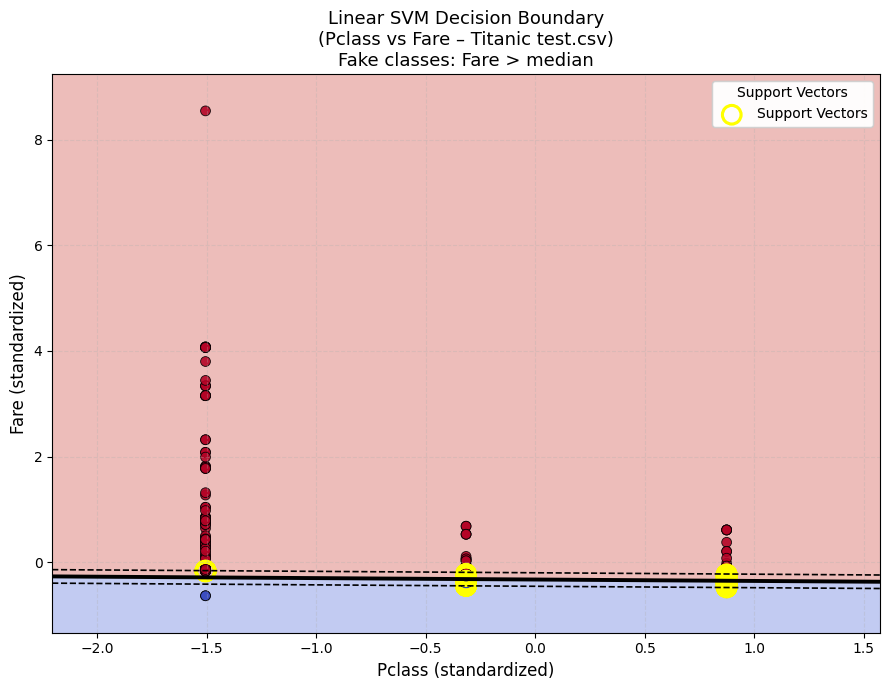

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# ────────────────────────────────────────────────
# 1. Load the test data
# ────────────────────────────────────────────────
filepath = r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\test.csv'
df = pd.read_csv(filepath)

# ────────────────────────────────────────────────
# 2. Drop columns not needed for this visualization
# ────────────────────────────────────────────────
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Sex', 'Embarked']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# ────────────────────────────────────────────────
# 3. Handle missing values (simple imputation)
# ────────────────────────────────────────────────
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
# If you want to use Age instead → uncomment next line
# df['Age'] = df['Age'].fillna(df['Age'].median())

# ────────────────────────────────────────────────
# 4. Select two features for 2D visualization
# ────────────────────────────────────────────────
features = ['Pclass', 'Fare']          # ← change here if you want other pair
X_vis = df[features].values

# ────────────────────────────────────────────────
# 5. Create fake binary labels for visualization
#    (example: high Fare = 1, low Fare = 0)
# ────────────────────────────────────────────────
median_value = df[features[1]].median()   # using the second feature (Fare)
y_vis = (df[features[1]] > median_value).astype(int).values

# Alternative fake labels examples (uncomment one if you prefer):
# y_vis = (df['Pclass'] == 1).astype(int).values               # 1st class = 1
# y_vis = (df['Age'] > df['Age'].median()).astype(int).values  # older = 1

# ────────────────────────────────────────────────
# 6. Scale the features
# ────────────────────────────────────────────────
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)

# ────────────────────────────────────────────────
# 7. Train Linear SVM
# ────────────────────────────────────────────────
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_scaled, y_vis)

# ────────────────────────────────────────────────
# 8. Create meshgrid for decision boundary
# ────────────────────────────────────────────────
x_min, x_max = X_scaled[:, 0].min() - 0.7, X_scaled[:, 0].max() + 0.7
y_min, y_max = X_scaled[:, 1].min() - 0.7, X_scaled[:, 1].max() + 0.7

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

P = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
P = P.reshape(xx.shape)

# ────────────────────────────────────────────────
# 9. Plot
# ────────────────────────────────────────────────
plt.figure(figsize=(9, 7))

# Decision regions
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.35)

# Decision boundary and margins
plt.contour(xx, yy, P, colors='black', levels=[-1, 0, 1],
            linestyles=['--', '-', '--'], linewidths=[1.2, 2.8, 1.2])

# Data points
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1],
                      c=y_vis, cmap='coolwarm', s=50,
                      edgecolors='k', linewidth=0.6, alpha=0.9)

# Support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=180, facecolors='none', edgecolors='yellow', linewidths=2.2,
            marker='o', label='Support Vectors')

# Labels & title
plt.xlabel(f'{features[0]} (standardized)', fontsize=12)
plt.ylabel(f'{features[1]} (standardized)', fontsize=12)
plt.title(f'Linear SVM Decision Boundary\n({features[0]} vs {features[1]} – Titanic test.csv)\n'
          f'Fake classes: {features[1]} > median', fontsize=13)

# Legend
handles, _ = scatter.legend_elements()
plt.legend(handles, ['Below or equal median', 'Above median'],
           title="Fake class", loc='upper left')
plt.gca().add_artist(plt.legend(loc='upper right', title="Support Vectors"))

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# ────────────────────────────────────────────────
# Define file paths (adjust if your folder structure changed)
# ────────────────────────────────────────────────
train_path = r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\train.csv'
test_path  = r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\test.csv'

# ────────────────────────────────────────────────
# Load both files
# ────────────────────────────────────────────────
df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

print("Train shape:", df_train.shape)
print("Test shape: ", df_test.shape)
print("\nTrain columns:", df_train.columns.tolist())

# ────────────────────────────────────────────────
# Fill missing values (now df_train exists)
# ────────────────────────────────────────────────
df_train['Age']      = df_train['Age'].fillna(df_train['Age'].median())
df_train['Fare']     = df_train['Fare'].fillna(df_train['Fare'].median())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

df_test['Age']       = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare']      = df_test['Fare'].fillna(df_test['Fare'].median())
# No Survived in test → no need to fill it

# ────────────────────────────────────────────────
# Convert Sex to numeric (very important feature!)
# ────────────────────────────────────────────────
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_test['Sex']  = df_test['Sex'].map({'male': 0, 'female': 1})

# ────────────────────────────────────────────────
# Choose features
# ────────────────────────────────────────────────
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

X      = df_train[features]
y      = df_train['Survived']
X_test = df_test[features]

# ────────────────────────────────────────────────
# Train a simple model
# ────────────────────────────────────────────────
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict who survives in test.csv
predictions = model.predict(X_test)

# ────────────────────────────────────────────────
# Create & show predictions
# ────────────────────────────────────────────────
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})

# Optional: save to file
submission.to_csv(r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\my_titanic_predictions.csv', index=False)

print("\nFirst 20 predicted survivals (PassengerId + Survived):")
print(submission.head(20))

print(f"\nPredicted survivors in test set: {predictions.sum()} out of {len(predictions)} passengers")

Train shape: (891, 12)
Test shape:  (418, 11)

Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

First 20 predicted survivals (PassengerId + Survived):
    PassengerId  Survived
0           892         0
1           893         0
2           894         1
3           895         1
4           896         0
5           897         0
6           898         0
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1
15          907         1
16          908         0
17          909         1
18          910         0
19          911         0

Predicted survivors in test set: 154 out of 418 passengers


In [21]:
# Merge predictions back to test data to see names
df_test_with_pred = df_test.copy()
df_test_with_pred['Survived'] = predictions

print("\nSample of predicted survivors from test.csv (with names):")
print(df_test_with_pred[df_test_with_pred['Survived'] == 1][['PassengerId', 'Name', 'Sex', 'Age', 'Pclass', 'Fare']].head(10))


Sample of predicted survivors from test.csv (with names):
    PassengerId                                               Name  Sex   Age  \
2           894                          Myles, Mr. Thomas Francis    0  62.0   
3           895                                   Wirz, Mr. Albert    0  27.0   
8           900          Abrahim, Mrs. Joseph (Sophie Halaut Easu)    1  18.0   
12          904      Snyder, Mrs. John Pillsbury (Nelle Stevenson)    1  23.0   
14          906  Chaffee, Mrs. Herbert Fuller (Carrie Constance...    1  47.0   
15          907      del Carlo, Mrs. Sebastiano (Argenia Genovesi)    1  24.0   
17          909                                  Assaf, Mr. Gerios    0  21.0   
21          913                          Olsen, Master. Artur Karl    0   9.0   
22          914               Flegenheim, Mrs. Alfred (Antoinette)    1  27.0   
24          916    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)    1  48.0   

    Pclass      Fare  
2        2    9.6875  
3  

In [22]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split   ← you can uncomment if you later need split

# Define both file paths clearly (this fixes the NameError)
train_path = r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\train.csv'
test_path  = r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\test.csv'

# Load the files
df_train = pd.read_csv(train_path)
df_test  = pd.read_csv(test_path)

# Quick check that files loaded correctly
print("Train shape:", df_train.shape)
print("Test shape: ", df_test.shape)
print("\nTrain columns:", df_train.columns.tolist())
print("Test columns: ", df_test.columns.tolist())

# ────────────────────────────────────────────────
# Basic preprocessing (fill missing values)
# ────────────────────────────────────────────────
df_train['Age']   = df_train['Age'].fillna(df_train['Age'].median())
df_train['Fare']  = df_train['Fare'].fillna(df_train['Fare'].median())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

df_test['Age']    = df_test['Age'].fillna(df_test['Age'].median())
df_test['Fare']   = df_test['Fare'].fillna(df_test['Fare'].median())
# Embarked not needed for prediction, but fill if you use it later
# df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])

# ────────────────────────────────────────────────
# Features (very basic set – you can expand this)
# ────────────────────────────────────────────────
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Handle categorical 'Sex' (very important feature!)
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_test['Sex']  = df_test['Sex'].map({'male': 0, 'female': 1})

# Add Sex to features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

X = df_train[features]
y = df_train['Survived']

X_test = df_test[features]

# ────────────────────────────────────────────────
# Train simple model
# ────────────────────────────────────────────────
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict on test set
predictions = model.predict(X_test)

# Create submission-style DataFrame
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})

# Save to CSV (you can submit this to Kaggle if you want)
submission.to_csv(r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\my_predictions.csv', index=False)

print("\nFirst 15 predicted survivals (PassengerId + Survived):")
print(submission.head(15))

print(f"\nPredicted number of survivors: {predictions.sum()} out of {len(predictions)}")

Train shape: (891, 12)
Test shape:  (418, 11)

Train columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test columns:  ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

First 15 predicted survivals (PassengerId + Survived):
    PassengerId  Survived
0           892         0
1           893         0
2           894         1
3           895         1
4           896         0
5           897         0
6           898         0
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1

Predicted number of survivors: 154 out of 418


In [23]:
import pandas as pd
import os

folder = r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs'

for file in os.listdir(folder):
    if 'survived' in file.lower() or 'label' in file.lower() or 'submission' in file.lower():
        print("Possible label file found:", file)
        try:
            df = pd.read_csv(os.path.join(folder, file))
            print("\nColumns:", df.columns.tolist())
            if 'Survived' in df.columns:
                print("\nFirst 10 rows with Survived:")
                print(df[['PassengerId', 'Survived']].head(10))
        except:
            print("Could not read file")

Possible label file found: gender_submission.csv

Columns: ['PassengerId', 'Survived']

First 10 rows with Survived:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


In [24]:
import pandas as pd

# Load the gender_submission.csv (adjust path if needed)
path = r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\gender_submission.csv'
df = pd.read_csv(path)

# Basic stats
print("Total passengers:", len(df))
print("Survivors (1):", df['Survived'].sum())
print("Non-survivors (0):", (df['Survived'] == 0).sum())
print("\nSurvival rate: {:.1%}".format(df['Survived'].mean()))

# Show some survivors (with PassengerId)
print("\nFirst 15 survivors (PassengerId where Survived = 1):")
print(df[df['Survived'] == 1][['PassengerId']].head(15).to_string(index=False))

# Show some non-survivors
print("\nFirst 15 non-survivors:")
print(df[df['Survived'] == 0][['PassengerId']].head(15).to_string(index=False))

Total passengers: 418
Survivors (1): 152
Non-survivors (0): 266

Survival rate: 36.4%

First 15 survivors (PassengerId where Survived = 1):
 PassengerId
         893
         896
         898
         900
         904
         906
         907
         910
         911
         914
         916
         918
         924
         925
         928

First 15 non-survivors:
 PassengerId
         892
         894
         895
         897
         899
         901
         902
         903
         905
         908
         909
         912
         913
         915
         917


In [25]:
test = pd.read_csv(r'C:\Ai_project\AI_2026\Day07 SVM\groupA\knbs\test.csv')
merged = test.merge(df, on='PassengerId')

print("\nSample survivors (with name, sex, class, age):")
print(merged[merged['Survived'] == 1][['PassengerId', 'Name', 'Sex', 'Age', 'Pclass']].head(10))


Sample survivors (with name, sex, class, age):
    PassengerId                                               Name     Sex  \
1           893                   Wilkes, Mrs. James (Ellen Needs)  female   
4           896       Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
6           898                               Connolly, Miss. Kate  female   
8           900          Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
12          904      Snyder, Mrs. John Pillsbury (Nelle Stevenson)  female   
14          906  Chaffee, Mrs. Herbert Fuller (Carrie Constance...  female   
15          907      del Carlo, Mrs. Sebastiano (Argenia Genovesi)  female   
18          910                       Ilmakangas, Miss. Ida Livija  female   
19          911              Assaf Khalil, Mrs. Mariana (Miriam")"  female   
22          914               Flegenheim, Mrs. Alfred (Antoinette)  female   

     Age  Pclass  
1   47.0       3  
4   22.0       3  
6   30.0       3  
8   18.0       3 